In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from matplotlib.colors import ListedColormap

In [2]:
# Load dataset and prepare binary classification (Setosa vs Versicolor)
iris = load_iris()
X = iris.data[:, :2]  # Only first two features for visualization
y = iris.target

# Filter out class 2 (Virginica) for binary classification
X = X[y != 2]
y = y[y != 2]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)
y_pred_lr = clf_lr.predict(X_test)

print("Logistic Regression Classification Report:\n")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)
y_pred_nb = clf_nb.predict(X_test)

print("Naive Bayes Classification Report:\n")
print(classification_report(y_test, y_pred_nb))


Naive Bayes Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



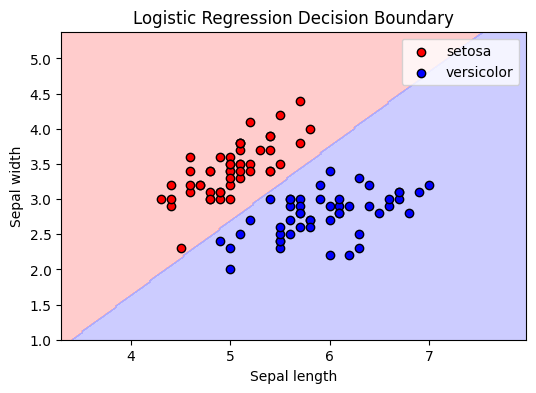

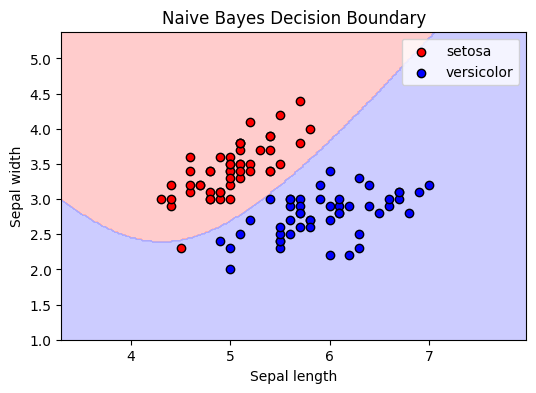

In [ ]:
def plot_decision_boundary(model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ['red', 'blue']

    plt.figure(figsize=(6, 4))
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)

    for i, color in zip(np.unique(y), cmap_bold):
        plt.scatter(X[y == i, 0], X[y == i, 1], c=color, label=iris.target_names[i], edgecolor='k')

    plt.title(title)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.legend()
    plt.show()

plot_decision_boundary(clf_lr, "Logistic Regression Decision Boundary")
plot_decision_boundary(clf_nb, "Naive Bayes Decision Boundary")
